# Oleaster (Eleagnus angustifolia) coverage investigation in the South Heves Grasslands Landscape Protection Area in 2023

## Importing libraries

In [1]:
import geopandas

from src.calculate_statistics.area_statistics import AreaStatisticsComparisonWithSampleArea
from src.utils.file_utils.write_csv import write_csv_from_dict
from src.utils.file_utils.write_excel import write_excel_sheet_from_dict, write_excel_sheet_from_dataframe
from src.utils.file_utils.create_results_folders import create_results_folder, remove_previous_results
from src.utils.languages.languages import languages

## Remove previous results

In [2]:
remove_previous_results('../../../results/oleasters_dhte_2023')

## Setting up results folder structure

In [3]:
create_results_folder(results_folder='../../../results', project_folder='oleasters_dhte_2023', figures_folder='diagrams', statistics_folder='area_statistics')

## Setting up language

In [4]:
language = languages['hu']

## Setting up the input data

In [5]:
oleasters_basic_data = geopandas.read_file(
    '../../../data/oleasters_dhte_2023/ezustfa_manual_digit.gpkg',
    layer='ezustfa_manual_digit'
)
sample_area_basic_data = geopandas.read_file(
    '../../../data/oleasters_dhte_2023/hatasterulet.gpkg',
    layer='hatasterulet_singlepart'
)

## Define Excel file

In [6]:
excel_file = '../../../results/oleasters_dhte_2023/area_statistics/oleasters.xlsx'

## Get sample area size in $m^2$

In [7]:
ludas_supbparts = sample_area_basic_data[sample_area_basic_data['subpart_name'].str.startswith('tarna')]
rakottyas_subparts = sample_area_basic_data[sample_area_basic_data['subpart_name'].str.startswith('pely')]

subpart_areas = {
    'Ludas': ludas_supbparts.geometry.area.sum(),
    'Rakottyás': rakottyas_subparts.geometry.area.sum(),
    language['sum']: ludas_supbparts.geometry.area.sum() + rakottyas_subparts.geometry.area.sum()
}
print('Area sizes')
print(subpart_areas)
write_excel_sheet_from_dict(dictionary=subpart_areas, file_name=excel_file, sheet_name=language['sub_areas'])

Area sizes
{'Ludas': 5613195.774895668, 'Rakottyás': 1757293.8048941833, 'összeg': 7370489.579789851}


## Spatial join the oleaster data with the sample areas

In [8]:
study_area = oleasters_basic_data.sjoin(sample_area_basic_data, how='left', predicate='intersects')

## Remove oleasters outside the study area and remove the unnecessary columns

In [9]:
study_area.dropna(subset=['subpart_name'], inplace=True)
study_area.drop(
    columns=['category', 'area_left', 'estimated_individuals', 'index_right', 'fejlesztes', 'area_right'],
    axis=1,
    inplace=True)
study_area.rename(columns={'subpart_name':language['sub_area_name']}, inplace=True)
print('Column names of the cleaned base data frame')
print(study_area.columns)
print('Sample data from the base data frame')
print(study_area.head(5))

Column names of the cleaned base data frame
Index(['geometry', 'részterület neve'], dtype='object')
Sample data from the base data frame
                                            geometry  részterület neve
0  POLYGON ((749211.412 242846.276, 749210.122 24...  tarna_ezustfa_02
1  POLYGON ((749206.311 242833.554, 749206.076 24...  tarna_ezustfa_02
2  POLYGON ((749362.769 242714.427, 749369.801 24...  tarna_ezustfa_02
3  POLYGON ((749348.192 242715.456, 749353.851 24...  tarna_ezustfa_02
4  POLYGON ((749374.225 242684.726, 749377.996 24...  tarna_ezustfa_02


## Calculate the area of the oleaster polygons in $m^2$

In [10]:
study_area[language['area']] = study_area.geometry.area

## Create dataframe for the two separated sample areas

In [11]:
ludas = study_area[study_area[language['sub_area_name']].str.startswith('tarna')]
rakottyas = study_area[study_area[language['sub_area_name']].str.startswith('pely')]
print('Sample data from the data frames separated by sub-areas')
print(ludas.head(5))
print(rakottyas.head(5))

Sample data from the data frames separated by sub-areas
                                            geometry  részterület neve  \
0  POLYGON ((749211.412 242846.276, 749210.122 24...  tarna_ezustfa_02   
1  POLYGON ((749206.311 242833.554, 749206.076 24...  tarna_ezustfa_02   
2  POLYGON ((749362.769 242714.427, 749369.801 24...  tarna_ezustfa_02   
3  POLYGON ((749348.192 242715.456, 749353.851 24...  tarna_ezustfa_02   
4  POLYGON ((749374.225 242684.726, 749377.996 24...  tarna_ezustfa_02   

      terület  
0    6.738424  
1   26.876360  
2  226.426230  
3  437.066467  
4   19.900229  
                                             geometry    részterület neve  \
7   POLYGON ((744568.667 244353.825, 744570.899 24...  pely_ezustfa_01-02   
10  POLYGON ((744601.368 244366.737, 744601.641 24...  pely_ezustfa_01-02   
11  POLYGON ((744519.753 244364.027, 744523.214 24...  pely_ezustfa_01-02   
14  POLYGON ((744536.057 244350.728, 744537.970 24...  pely_ezustfa_01-02   
15  POLYGON ((7445

## Calculate statistics

In [12]:
study_area_statistics = AreaStatisticsComparisonWithSampleArea(
    study_area,
    subpart_areas['Ludas'] + subpart_areas['Rakottyás'],
    language = 'hu'
)
ludas_statistics = AreaStatisticsComparisonWithSampleArea(
    ludas,
    subpart_areas['Ludas'],
    language='hu'
)
rakottyas_statistics = AreaStatisticsComparisonWithSampleArea(
    rakottyas,
    subpart_areas['Rakottyás'],
    language='hu'
)
print('Statistics for all sample areas')
print(study_area_statistics.get_area_statistics())
print('Statistics for Ludas sample area')
print(ludas_statistics.get_area_statistics())
print('Statistics for Rakottyas sample area')
print(rakottyas_statistics.get_area_statistics())

Statistics for all sample areas
{'összeg': 139301.57289901393, 'darabszám': 1269, 'átlag': 109.77271308038922, 'medián': 37.40357533628124, 'szórás': 307.3942775632389, 'minimum': 0.39495606443404835, 'első kvartilis': 13.537664095935124, 'második kvartilis': 37.40357533628124, 'harmadik kvartilis': 92.37866889549393, 'természetes intervallumok': [215.12704924562556, 782.8658243967652, 2576.215276210259], 'egyenlő intervallum': 1421.1997025772728, 'egyenlő intervallumok hatarértékei': [1421.594658641707, 2842.7943612189797, 4263.994063796253], 'maximum': 5685.193766373525, 'mintaterület nagysága': 7370489.579789851, 'vizsgált terület aránya': 1.889990771861124}
Statistics for Ludas sample area
{'összeg': 101315.55848202194, 'darabszám': 831, 'átlag': 121.92004630808897, 'medián': 38.883300189377984, 'szórás': 357.5945960268639, 'minimum': 0.5398059108270392, 'első kvartilis': 15.71703456440053, 'második kvartilis': 38.883300189377984, 'harmadik kvartilis': 97.56318703376414, 'természet

## Write statistics to csv

In [13]:
write_csv_from_dict(
    study_area_statistics.get_area_statistics(),
    '../../../results/oleasters_dhte_2023/area_statistics/study_area_statistics.csv'
)
write_csv_from_dict(
    ludas_statistics.get_area_statistics(),
    '../../../results/oleasters_dhte_2023/area_statistics/ludas_statistics.csv'
)
write_csv_from_dict(
    rakottyas_statistics.get_area_statistics(),
    '../../../results/oleasters_dhte_2023/area_statistics/rakottyas_statistics.csv'
)

## Write statistics to Excel

In [14]:
write_excel_sheet_from_dict(
    study_area_statistics.get_area_statistics(),
    file_name=excel_file,
    sheet_name=f'{language["study_area"]} {language["statistics"]}'
)
write_excel_sheet_from_dict(
    ludas_statistics.get_area_statistics(),
    file_name=excel_file,
    sheet_name=f'Ludas {language["statistics"]}'
)
write_excel_sheet_from_dict(
    rakottyas_statistics.get_area_statistics(),
    file_name=excel_file,
    sheet_name=f'Rakottyás {language["statistics"]}'
)

## Classify polygons by area size based on natural breaks (Fisher-Jenks Algorithm), equal intervals, quartiles and based on estimated number of individuals

In [15]:
study_area_statistics.add_area_classifications_to_data()
ludas_statistics.add_area_classifications_to_data()
rakottyas_statistics.add_area_classifications_to_data()

In [16]:
print(study_area_statistics.data.columns)

Index(['geometry', 'részterület neve', 'terület', 'természetes intervallumok',
       'egyenlő intervallumok hatarértékei', 'kvartilisek'],
      dtype='object')


### Add the custom classification to the data

In [17]:
individual_classification_breaks = [100, 500, 1000]
estimated_minimum = [1, 2, 5, 10]
estimated_maximum = [1, 4, 9, 100]
estimated_minimum_individuals_label = language['estimated_minimum_individuals']
estimated_maximum_individuals_label = language['estimated_maximum_individuals']
study_area_statistics.classify_areas(
    area_field_name=language['area'],
    breaks=individual_classification_breaks,
    labels=estimated_minimum,
    new_column_name=estimated_minimum_individuals_label
)
ludas_statistics.classify_areas(
    area_field_name='area',
    breaks=individual_classification_breaks,
    labels=estimated_minimum,
    new_column_name=estimated_minimum_individuals_label
)
rakottyas_statistics.classify_areas(
    area_field_name='area',
    breaks=individual_classification_breaks,
    labels=estimated_minimum,
    new_column_name=estimated_minimum_individuals_label
)
study_area_statistics.classify_areas(
    area_field_name='area',
    breaks=individual_classification_breaks,
    labels=estimated_maximum,
    new_column_name=estimated_maximum_individuals_label
)
ludas_statistics.classify_areas(
    area_field_name='area',
    breaks=individual_classification_breaks,
    labels=estimated_maximum,
    new_column_name=estimated_maximum_individuals_label
)
rakottyas_statistics.classify_areas(
    area_field_name='area',
    breaks=individual_classification_breaks,
    labels=estimated_maximum,
    new_column_name=estimated_maximum_individuals_label
)

/Users/aferenc/Documents/delheves/describe_gis_data/venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/aferenc/Documents/delheves/describe_gis_data/venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


### Write classified data to geopackage

In [18]:
study_area_statistics.data.to_file(
    '../../../results/oleasters_dhte_2023/gis_data/oleasters.gpkg',
    layer='study_area',
    driver='GPKG'
)
ludas_statistics.data.to_file(
    '../../../results/oleasters_dhte_2023/gis_data/oleasters.gpkg',
    layer='ludas',
    driver='GPKG'
)
rakottyas_statistics.data.to_file(
    '../../../results/oleasters_dhte_2023/gis_data/oleasters.gpkg',
    layer='rakottyas',
    driver='GPKG'
)

### Write classified data to csv

In [19]:
study_area_statistics.data.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/study_area_classification.csv',
    index=False
)
ludas_statistics.data.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/ludas_area_classification.csv',
    index=False
)
rakottyas_statistics.data.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/rakottyas_area_classification.csv',
    index=False
)

### Write classified data to excel

In [20]:
write_excel_sheet_from_dataframe(
    study_area_statistics.data,
    file_name=excel_file,
    sheet_name=f'{language["study_area"]}_{language["classification"]}'
)
write_excel_sheet_from_dataframe(
    ludas_statistics.data,
    file_name=excel_file,
    sheet_name=f'Ludas {language["classification"]}'
)
write_excel_sheet_from_dataframe(
    study_area_statistics.data,
    file_name=excel_file,
    sheet_name=f'Rakottys_{language["classification"]}'
)

## Jenks' classification analysis

### Create statistics by natural break categories

In [21]:
study_area_jenks_statistics = study_area_statistics.get_classification_area_statistics(
    language['jenks'],
    language['area'],
    subpart_areas[language['sum']]
)
ludas_jenks_statistics = ludas_statistics.get_classification_area_statistics(
    language['jenks'],
    language['area'],
    subpart_areas['Ludas']
)
rakottyas_jenks_statistics = rakottyas_statistics.get_classification_area_statistics(
    language['jenks'],
    language['area'],
    subpart_areas['Rakottyás']
)
print('The jenks classification data for the three areas')
print(study_area_jenks_statistics)
print(ludas_jenks_statistics)
print(rakottyas_jenks_statistics)

The jenks classification data for the three areas
                     osztályok  darabszám       terület  \
0  természetes intervallumok 0       1132  53704.768937   
1  természetes intervallumok 1        111  42715.901429   
2  természetes intervallumok 2         23  28084.240078   
3  természetes intervallumok 3          3  14796.662454   

   osztály elemeinek átlagos területe  területarány  \
0                           47.442375     38.552881   
1                          384.827941     30.664335   
2                         1221.053916     20.160749   
3                         4932.220818     10.622035   

   területarány a mintaterülethez viszonyítva  
0                                    0.728646  
1                                    0.579553  
2                                    0.381036  
3                                    0.200755  
                     osztályok  darabszám       terület  \
0  természetes intervallumok 0        724  33632.114825   
1  természetes inter

### Write natural break statistics to csv

In [22]:
study_area_jenks_statistics.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/study_area_jenks_statistics.csv',
     index=False
)
ludas_jenks_statistics.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/ludas_jenks_statistics.csv',
    index=False
)
rakottyas_jenks_statistics.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/rakottyas_jenks_statistics.csv',
    index=False
)

### Write natural break statistics to excel

In [23]:
write_excel_sheet_from_dataframe(
    study_area_jenks_statistics,
    file_name=excel_file,
    sheet_name=f'{language["study_area"]} {language["jenks"]} {language["statistics"]}'
)
write_excel_sheet_from_dataframe(
    ludas_jenks_statistics,
    file_name=excel_file,
    sheet_name=f'Ludas {language["jenks"]} {language["statistics"]}'
)
write_excel_sheet_from_dataframe(
    rakottyas_jenks_statistics,
    file_name=excel_file,
    sheet_name=f'Rakottyás {language["jenks"]} {language["statistics"]}'
)

/Users/aferenc/Documents/delheves/describe_gis_data/venv/lib/python3.11/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


### Create diagram for natural break statistics

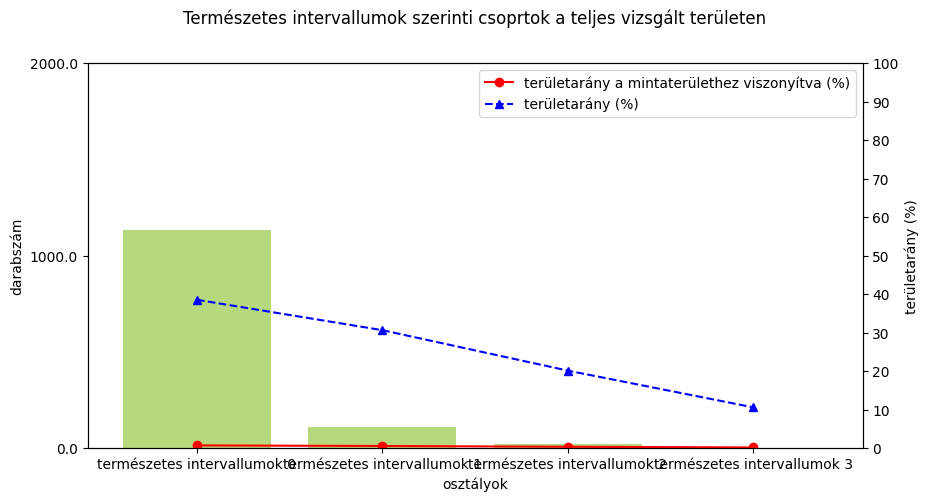

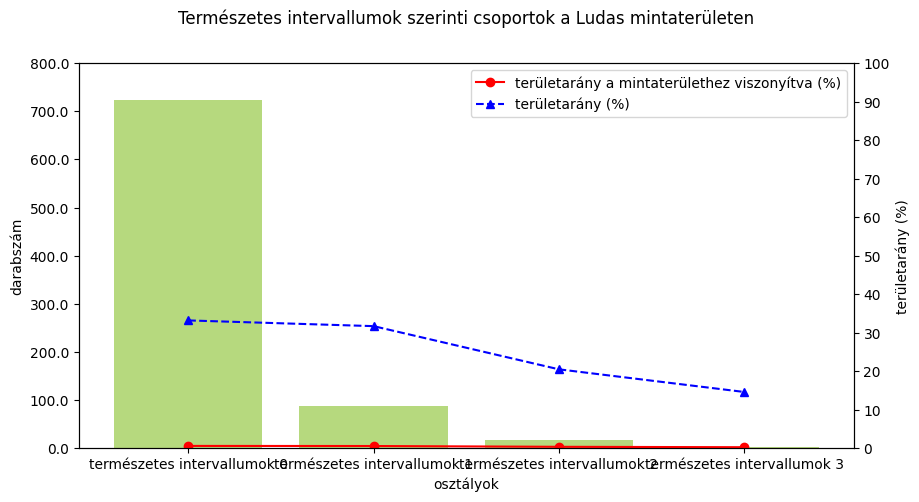

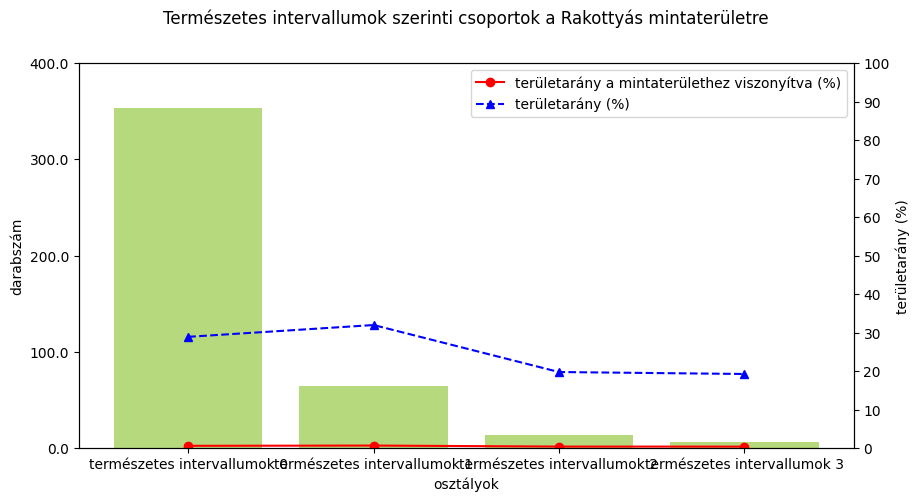

In [24]:
study_area_statistics.create_classification_diagram(
    classification_column_name=language['jenks'],
    sample_area=subpart_areas[language['sum']],
    path='../../../results/oleasters_dhte_2023/diagrams/study_area_jenks_diagram.png',
    diagram_title=language['natural_break_study_area_diagram_title']
)
ludas_statistics.create_classification_diagram(
    classification_column_name=language['jenks'],
    sample_area=subpart_areas['Ludas'],
    path='../../../results/oleasters_dhte_2023/diagrams/ludas_jenks_diagram.png',
    diagram_title=language['natural_break_ludas_diagram_title']
)
rakottyas_statistics.create_classification_diagram(
    classification_column_name=language['jenks'],
    sample_area=subpart_areas['Rakottyás'],
    path='../../../results/oleasters_dhte_2023/diagrams/rakottyas_jenks_diagram.png',
    diagram_title=language['natural_break_rakottyas_diagram_title']
)

### Create pie chart for area distribution in jenks classification

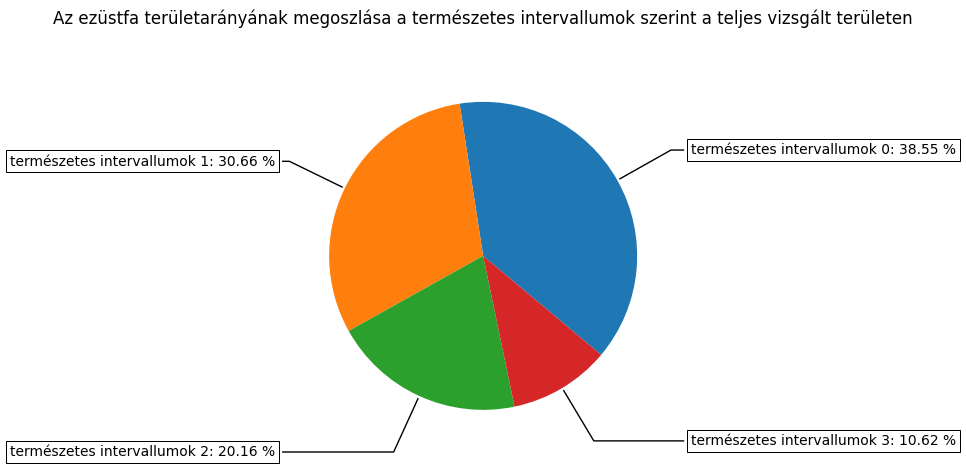

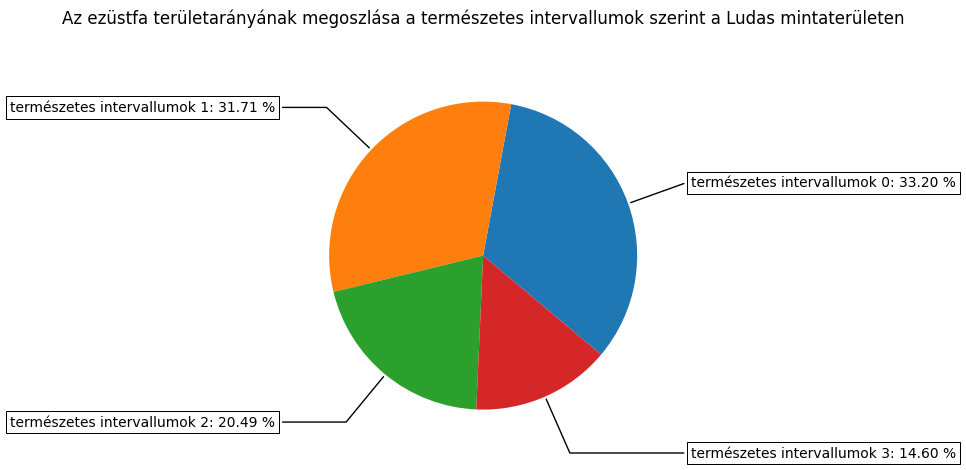

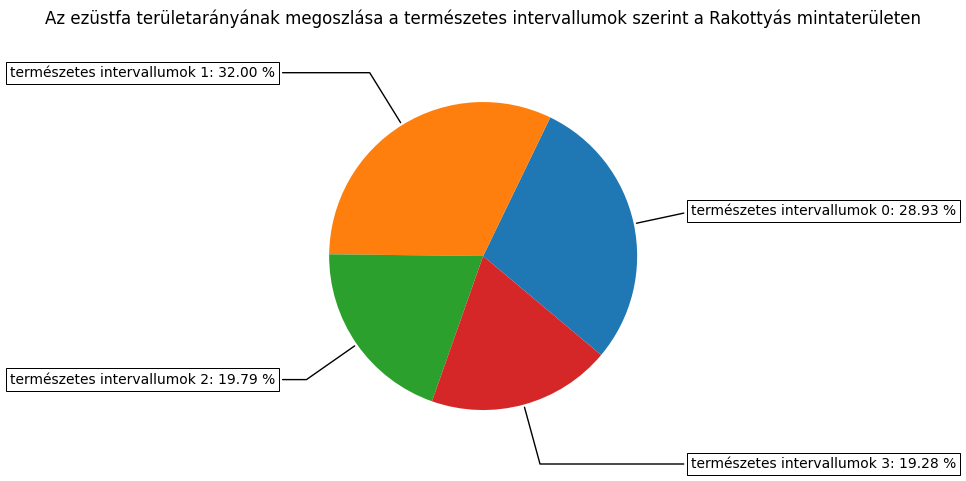

In [25]:
study_area_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name=language['jenks'],
    sample_area=subpart_areas[language['sum']],
    path='../../../results/oleasters_dhte_2023/diagrams/study_area_jenks_pie_chart.png',
    diagram_title=language['natural_break_study_area_pie_chart_diagram_title']
)
ludas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name=language['jenks'],
    sample_area=subpart_areas['Ludas'],
    path='../../../results/oleasters_dhte_2023/diagrams/ludas_jenks_pie_chart.png',
    diagram_title=language['natural_break_ludas_pie_chart_diagram_title']
)
rakottyas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name=language['jenks'],
    sample_area=subpart_areas['Rakottyás'],
    path='../../../results/oleasters_dhte_2023/diagrams/rakottyas_jenks_pie_chart.png',
    diagram_title=language['natural_break_rakottyas_pie_chart_diagram_title']
)

## Equal interval classification analysis

In [26]:
study_area_equal_interval_statistics = study_area_statistics.get_classification_area_statistics(
    language['equal_interval_breaks'],
    language['area'],
    subpart_areas[language['sum']]
)
ludas_equal_interval_statistics = ludas_statistics.get_classification_area_statistics(
    language['equal_interval_breaks'],
    language['area'],
    subpart_areas['Ludas']
)
rakottyas_equal_interval_statistics = rakottyas_statistics.get_classification_area_statistics(
    language['equal_interval_breaks'],
    language['area'],
    subpart_areas['Rakottyás']
)
print('The equal interval classification data for the three areas')
print(study_area_equal_interval_statistics)
print(ludas_equal_interval_statistics)
print(rakottyas_equal_interval_statistics)

The equal interval classification data for the three areas
               osztályok  darabszám        terület  \
0  egyenlő intervallum 0       1260  114452.896285   
1  egyenlő intervallum 1          6   10052.014160   
2  egyenlő intervallum 3          3   14796.662454   

   osztály elemeinek átlagos területe  területarány  \
0                           90.835632     82.161955   
1                         1675.335693      7.216009   
2                         4932.220818     10.622035   

   területarány a mintaterülethez viszonyítva  
0                                    1.552853  
1                                    0.136382  
2                                    0.200755  
               osztályok  darabszám       terület  \
0  egyenlő intervallum 0        824  79454.542678   
1  egyenlő intervallum 1          4   7064.353350   
2  egyenlő intervallum 3          3  14796.662454   

   osztály elemeinek átlagos területe  területarány  \
0                           96.425416     7

### Write equal interval statistics to csv

In [27]:
study_area_equal_interval_statistics.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/study_area_equal_interval_statistics.csv',
    index=False
)
ludas_equal_interval_statistics.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/ludas_equal_interval_statistics.csv',
    index=False
)
rakottyas_equal_interval_statistics.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/rakottyas_equal_interval_statistics.csv',
    index=False
)

### Write equal interval statistics to excel

In [28]:
write_excel_sheet_from_dataframe(
    study_area_equal_interval_statistics,
    file_name=excel_file,
    sheet_name=f'{language["study_area"]} {language["equal_interval"]} {language["statistics"]}'
)
write_excel_sheet_from_dataframe(
    ludas_equal_interval_statistics,
    file_name=excel_file,
    sheet_name=f'Ludas {language["equal_interval"]} {language["statistics"]}'
)
write_excel_sheet_from_dataframe(
    rakottyas_equal_interval_statistics,
    file_name=excel_file,
    sheet_name=f'Rakottyás {language["equal_interval"]} {language["statistics"]}'
)

/Users/aferenc/Documents/delheves/describe_gis_data/venv/lib/python3.11/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


### Create diagrams for equal interval statistics

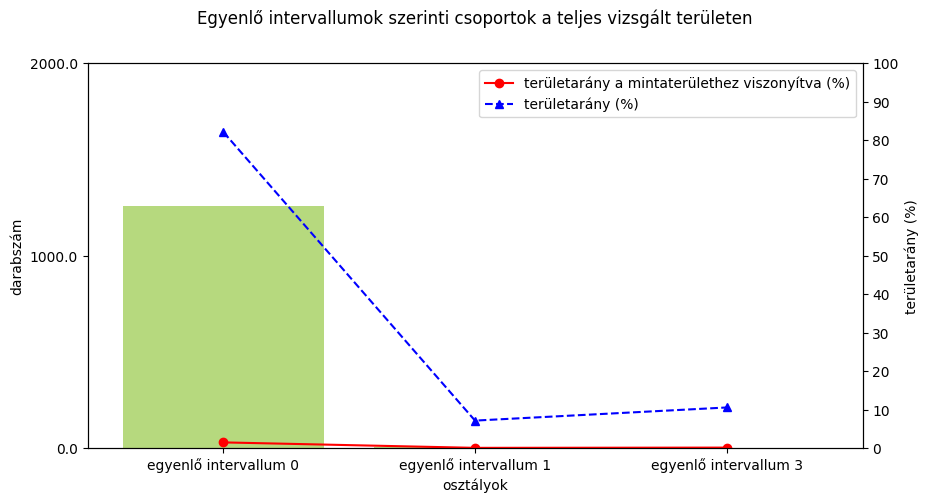

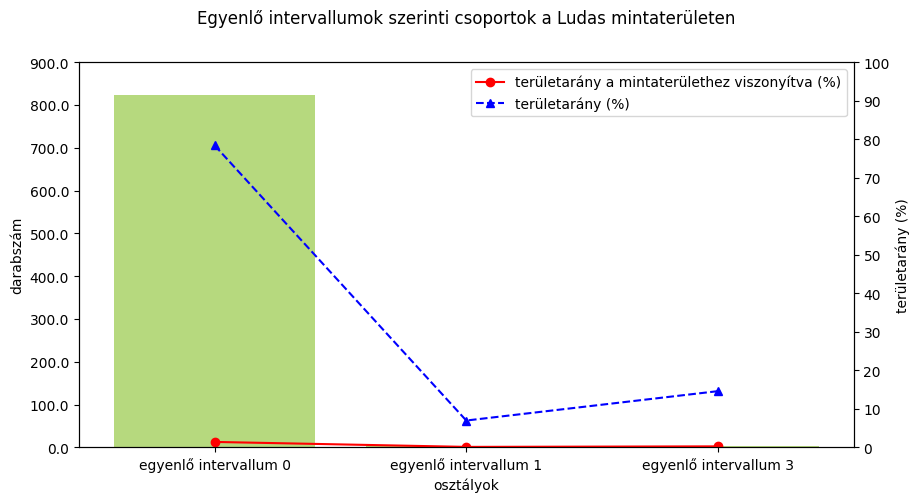

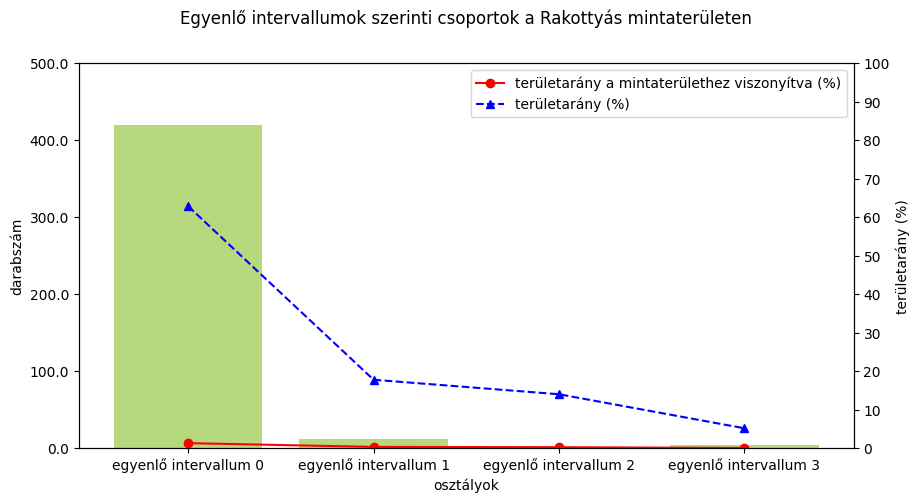

In [29]:
study_area_statistics.create_classification_diagram(
    classification_column_name=language['equal_interval_breaks'],
    sample_area=subpart_areas[language['sum']],
    path='../../../results/oleasters_dhte_2023/diagrams/study_area_equal_interval_diagram.png',
    diagram_title=language['equal_interval_study_area_diagram_title']
)
ludas_statistics.create_classification_diagram(
    classification_column_name=language['equal_interval_breaks'],
    sample_area=subpart_areas['Ludas'],
    path='../../../results/oleasters_dhte_2023/diagrams/ludas_equal_interval_diagram.png',
    diagram_title=language['equal_interval_ludas_diagram_title']
)
rakottyas_statistics.create_classification_diagram(
    classification_column_name=language['equal_interval_breaks'],
    sample_area=subpart_areas['Rakottyás'],
    path='../../../results/oleasters_dhte_2023/diagrams/rakottyas_equal_interval_diagram.png',
    diagram_title=language['equal_interval_rakottyas_diagram_title']
)

### Create pie chart for area distribution in equal interval classification

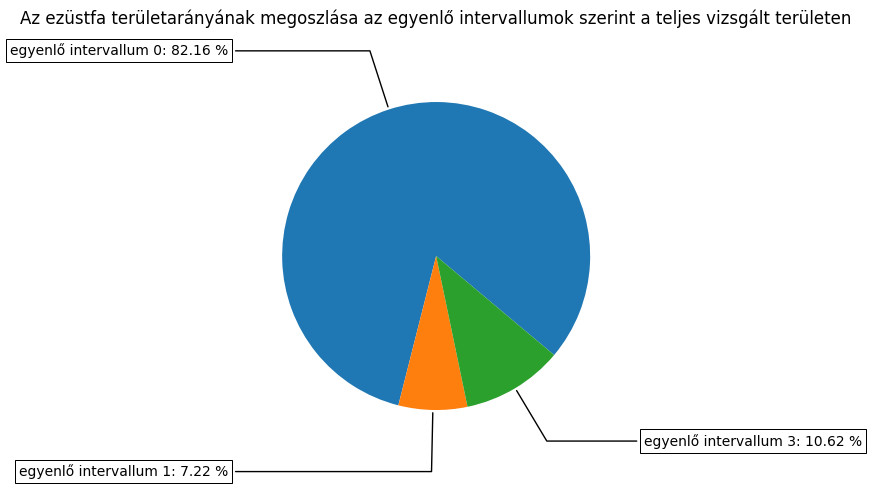

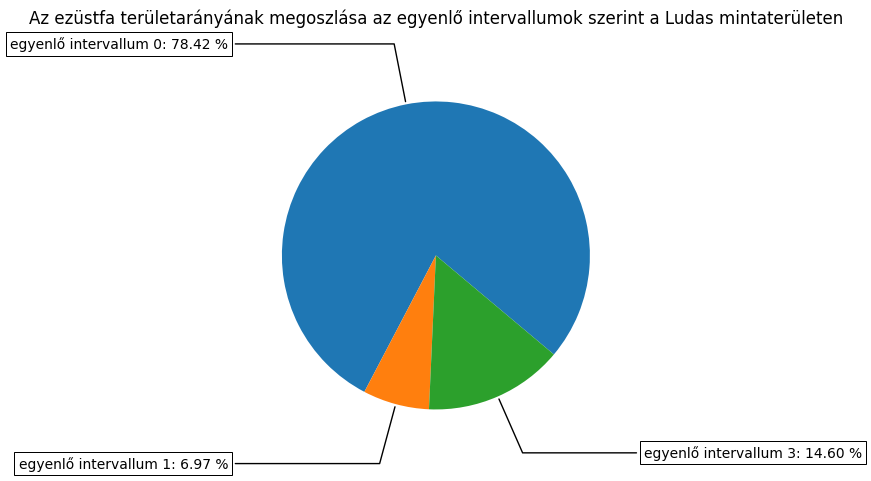

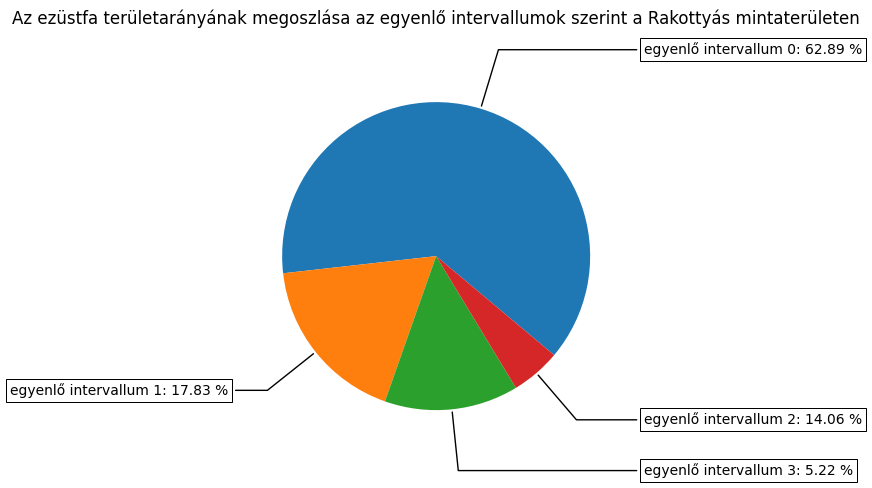

In [30]:
study_area_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name=language['equal_interval_breaks'],
    sample_area=subpart_areas[language['sum']],
    path='../../../results/oleasters_dhte_2023/diagrams/study_area_equal_interval_pie_chart.png',
    diagram_title=language['equal_interval_study_area_pie_chart_diagram_title']
)
ludas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name=language['equal_interval_breaks'],
    sample_area=subpart_areas['Ludas'],
    path='../../../results/oleasters_dhte_2023/diagrams/ludas_equal_interval_pie_chart.png',
    diagram_title=language['equal_interval_ludas_pie_chart_diagram_title']
)
rakottyas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name=language['equal_interval_breaks'],
    sample_area=subpart_areas['Rakottyás'],
    path='../../../results/oleasters_dhte_2023/diagrams/rakottyas_equal_interval_pie_chart.png',
    diagram_title=language['equal_interval_rakottyas_pie_chart_diagram_title']
)

## Quartile classification analysis

### Calculate quartile statistics

In [31]:
study_area_quartile_statistics = study_area_statistics.get_classification_area_statistics(
    language['quartiles'],
    language['area'],
    subpart_areas[language['sum']]
)
ludas_quartile_statistics = ludas_statistics.get_classification_area_statistics(
    language['quartiles'],
    language['area'],
    subpart_areas['Ludas']
)
rakottyas_quartile_statistics = rakottyas_statistics.get_classification_area_statistics(
    language['quartiles'],
    language['area'],
    subpart_areas['Rakottyás']
)
print('The quartile classification data for the three areas')
print(study_area_quartile_statistics)
print(ludas_quartile_statistics)
print(rakottyas_quartile_statistics)

The quartile classification data for the three areas
     osztályok  darabszám        terület  osztály elemeinek átlagos területe  \
0  kvartilis 0        318    2108.476408                            6.630429   
1  kvartilis 1        317    7639.984734                           24.100898   
3  kvartilis 2        317  110492.155651                          348.555696   
2  kvartilis 3        317   19060.956106                           60.129199   

   területarány  területarány a mintaterülethez viszonyítva  
0      1.513606                                    0.028607  
1      5.484493                                    0.103656  
3     79.318671                                    1.499116  
2     13.683231                                    0.258612  
     osztályok  darabszám       terület  osztály elemeinek átlagos területe  \
0  kvartilis 0        208   1703.764043                            8.191173   
1  kvartilis 1        208   5411.720974                           26.017889   

### Write quartile statistics to csv

In [32]:
study_area_quartile_statistics.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/study_area_quartile_statistics.csv',
    index=False
)
ludas_quartile_statistics.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/ludas_quartile_statistics.csv',
    index=False
)
rakottyas_quartile_statistics.to_csv(
    '../../../results/oleasters_dhte_2023/area_statistics/rakottyas_quartile_statistics.csv',
    index=False
)

### Write quartile statistics to excel

In [33]:
write_excel_sheet_from_dataframe(
    study_area_quartile_statistics,
    file_name=excel_file,
    sheet_name='study_area_quartile_statistics'
)
write_excel_sheet_from_dataframe(
    ludas_quartile_statistics,
    file_name=excel_file,
    sheet_name='ludas_quartile_statistics'
)
write_excel_sheet_from_dataframe(
    rakottyas_quartile_statistics,
    file_name=excel_file,
    sheet_name='rakottyas_quartile_statistics'
)

/Users/aferenc/Documents/delheves/describe_gis_data/venv/lib/python3.11/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


### Create diagrams for quartile statistics

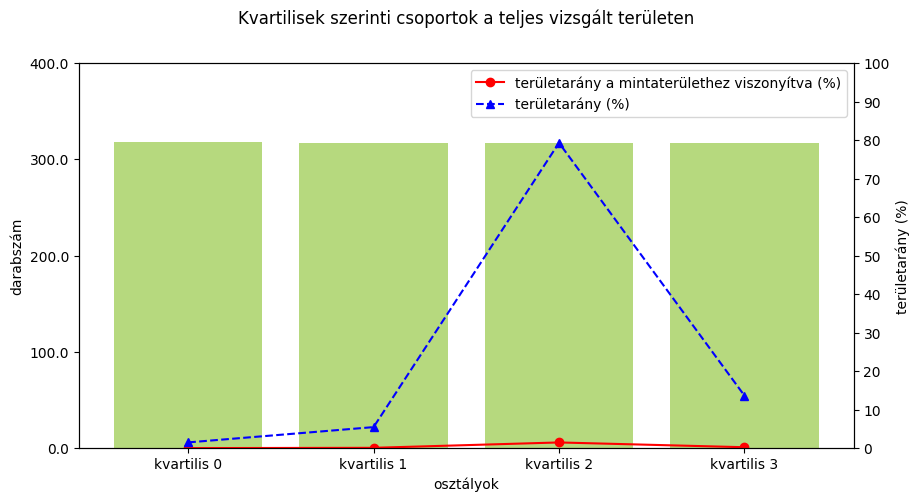

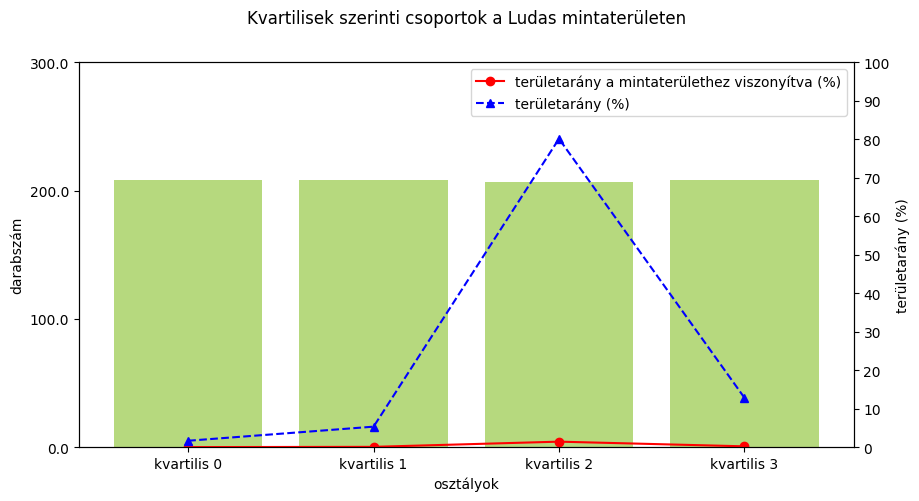

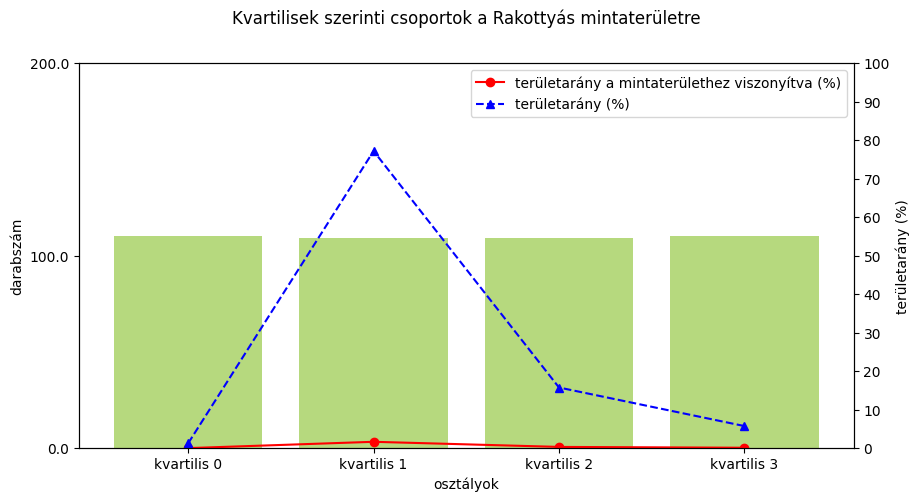

In [34]:
study_area_statistics.create_classification_diagram(
    classification_column_name=language['quartiles'],
    sample_area=subpart_areas[language['sum']],
    path='../../../results/oleasters_dhte_2023/diagrams/study_area_quartile_statistics.png',
    diagram_title=language['quartiles_study_area_diagram_title']
)
ludas_statistics.create_classification_diagram(
    classification_column_name=language['quartiles'],
    sample_area=subpart_areas['Ludas'],
    path='../../../results/oleasters_dhte_2023/diagrams/ludas_quartile_statistics.png',
    diagram_title=language['quartiles_ludas_diagram_title']
)
rakottyas_statistics.create_classification_diagram(
    classification_column_name=language['quartiles'],
    sample_area=subpart_areas['Rakottyás'],
    path='../../../results/oleasters_dhte_2023/diagrams/rakottyas_quartile_statistics.png',
    diagram_title=language['quartiles_rakottyas_diagram_title']
)

### Create pie chart for area distribution based on quartiles

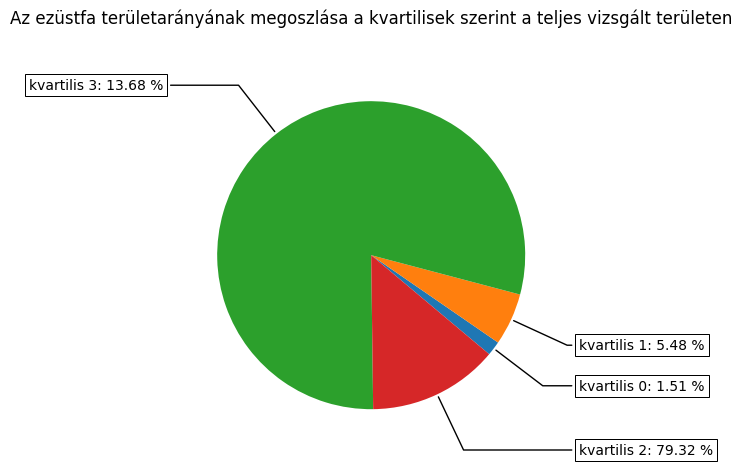

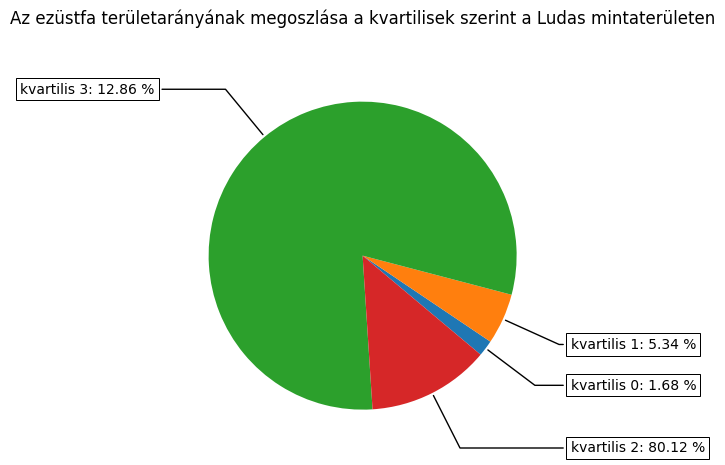

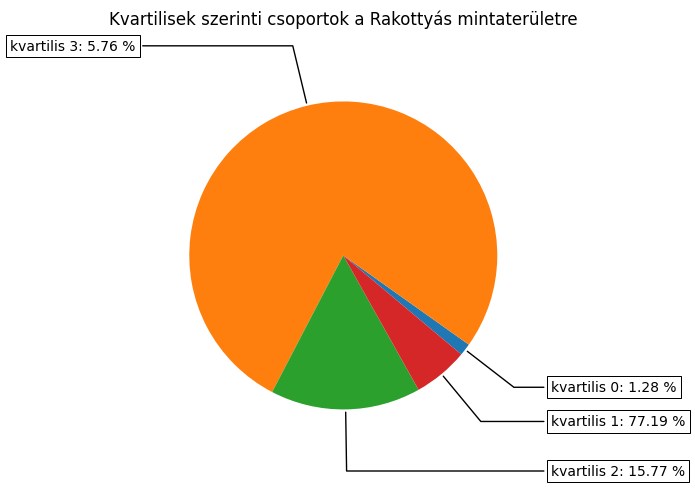

In [35]:
study_area_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name=language['quartiles'],
    sample_area=subpart_areas[language['sum']],
    path='../../../results/oleasters_dhte_2023/diagrams/study_area_quartile_pie_chart.png',
    diagram_title=language['quartiles_study_area_pie_chart_diagram_title']
)
ludas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name=language['quartiles'],
    sample_area=subpart_areas['Ludas'],
    path='../../../results/oleasters_dhte_2023/diagrams/ludas_quartile_pie_chart.png',
    diagram_title=language['quartiles_ludas_pie_chart_diagram_title']
)
rakottyas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name=language['quartiles'],
    sample_area=subpart_areas['Rakottyás'],
    path='../../../results/oleasters_dhte_2023/diagrams/rakottyas_quartile_pie_chart.png',
    diagram_title=language['quartiles_rakottyas_diagram_title']
)

## Estimate number of individuals

In [36]:
study_area_minimum_values = study_area_statistics.data[language['estimated_minimum_individuals']].astype(int).sum()
study_area_maximum_values = study_area_statistics.data[language['estimated_maximum_individuals']].astype(int).sum()
print(study_area_minimum_values)
print(study_area_maximum_values)


1782
4000
